In [448]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [449]:
merged_df = pd.read_csv('merged_df.csv', encoding='iso-8859-1')

merged_df.sample(3)

,area_abbreviation,area_code,area,item_code,item,element_code,element,unit,latitude,longitude,...,population_unit,value,flag,flag_description,note,years_existing,average_production,value_per_capita,iso_alpha3,continent
19816,ARE,225,United Arab Emirates,2630,Coffee and products,5142,Food,1000 tonnes,23.42,53.85,...,1000,9400.145,X,International reliable sources,"UNDESA, Population Division â World Populati...",53,5.339623,9.400145,ARE,Asia
16483,LCA,189,Saint Lucia,2744,Eggs,5142,Food,1000 tonnes,13.91,-60.98,...,1000,178.844,X,International reliable sources,"UNDESA, Population Division â World Populati...",53,0.339623,0.178844,LCA,North America
1912,BLZ,23,Belize,2765,Crustaceans,5142,Food,1000 tonnes,17.19,-88.50,...,1000,374.681,X,International reliable sources,"UNDESA, Population Division â World Populati...",53,0.358491,0.374681,BLZ,North America


In [450]:
#copied from compasison_plot

top_5_areas = merged_df.groupby('area')['average_production'].mean().nlargest(5)
filtered_food = (merged_df['area'].isin(top_5_areas.index)) & (merged_df['element'] == 'Food')
filtered_feed = (merged_df['area'].isin(top_5_areas.index)) & (merged_df['element'] == 'Feed')
merged_df[filtered_food].groupby(['area', 'item'])['average_production'].mean().reset_index()
top_5_food = merged_df[filtered_food].groupby(['area', 'item', 'element'])['average_production'].mean()
top_5_food = top_5_food.groupby('area').nlargest(5).reset_index(level=0, drop=True).reset_index()

top_5_food

,area,item,element,average_production
0,Brazil,Cereals - Excluding Beer,Food,15129.226415
1,Brazil,Milk - Excluding Butter,Food,14177.245283
2,Brazil,Fruits - Excluding Wine,Food,13762.622642
3,Brazil,Starchy Roots,Food,10348.716981
4,Brazil,Meat,Food,8237.867925
5,"China, mainland",Vegetables,Food,170690.452830
6,"China, mainland",Cereals - Excluding Beer,Food,163752.188679
7,"China, mainland","Vegetables, Other",Food,150235.811321
8,"China, mainland",Starchy Roots,Food,87244.867925
9,"China, mainland",Rice (Milled Equivalent),Food,80586.169811


In [451]:
##PREPARATION FOR LINE PLOT

# function to Loop through the columns in the filtered_df that start with 'y'
def extract_year_values(df):
    area_code = df['area_code'].values[0]
    item_code = df['item_code'].values[0]
    continent = df['continent'].values[0]
    item = df['item'].values[0]
    element = df['element'].values[0]
    year_values = []
    for col in df.columns:
        if col.startswith('y') and col not in ['year_code', 'year', 'years_existing']:
            year = int(col[1:])  # extract the year from the column name
            value = df[col].values[0]  # get the value for this year
            year_values.append({
                'area': area_code,
                'item Code': item_code,
                'item': item,
                'year': year,
                'year Value': value,
                'continent' : continent,
                'element' : element
            })
    return pd.DataFrame(year_values)



def plot_top_items(df, area, items, element, str):
    plt.figure(figsize=(10, 6))
    
    # Loop through each item and filter, extract, and plot the data
    for item in items:
        # Filter the DataFrame for the specified area, item, and element
        filtered_df = df[(df[str] == area) & (df['item'] == item) & (df['element'] == element)]
        
        # Extract year values
        year_df = extract_year_values(filtered_df)
        
        # Plot the data
        sns.lineplot(x='year', y='year Value', data=year_df, label=item)
    
    # Customize the plot
    plt.title(f'Line Plot for Top 5 {element} Items in {area}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend(title=f'{element} Items')
    plt.show()


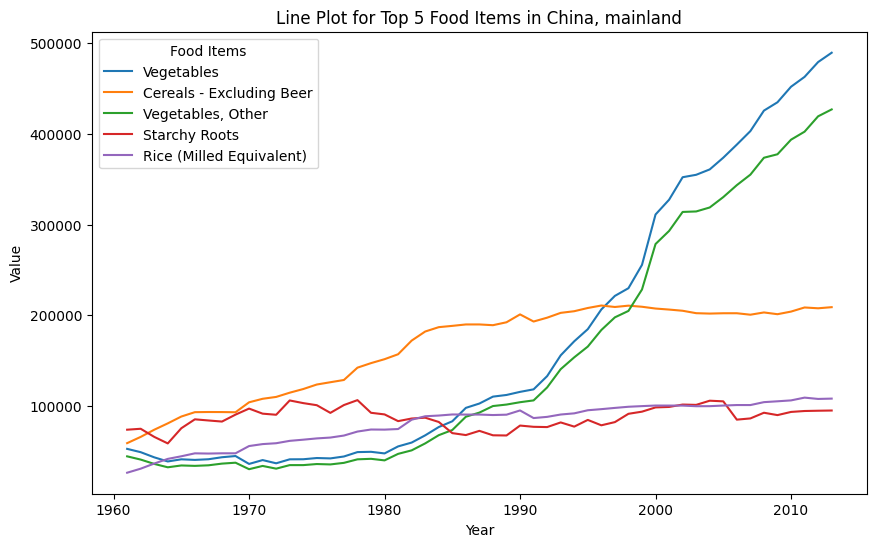

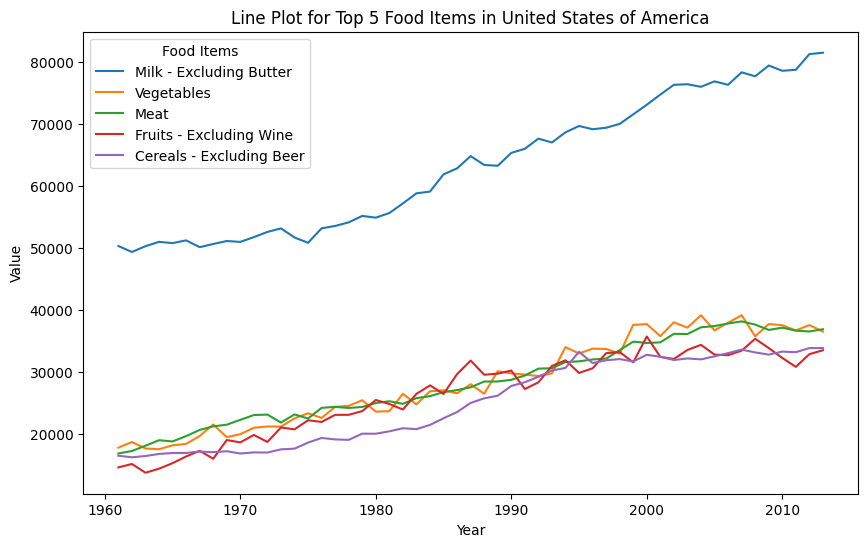

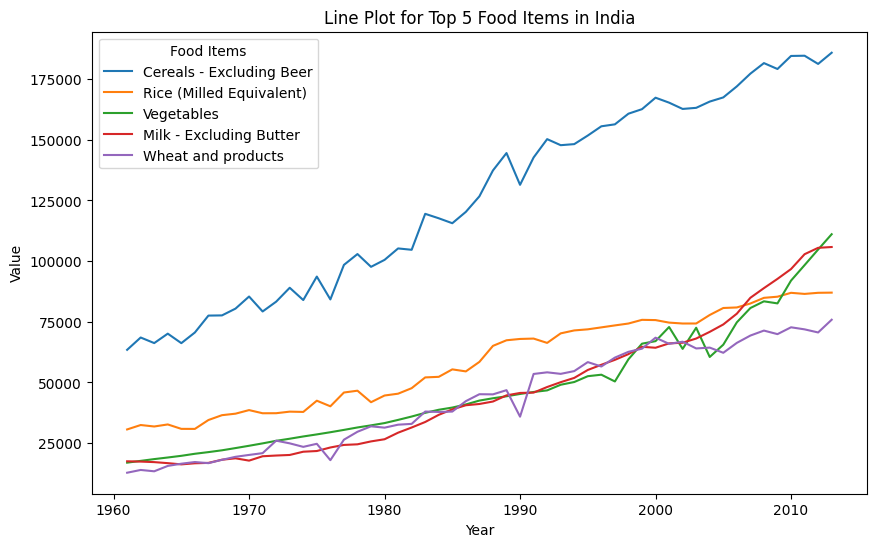

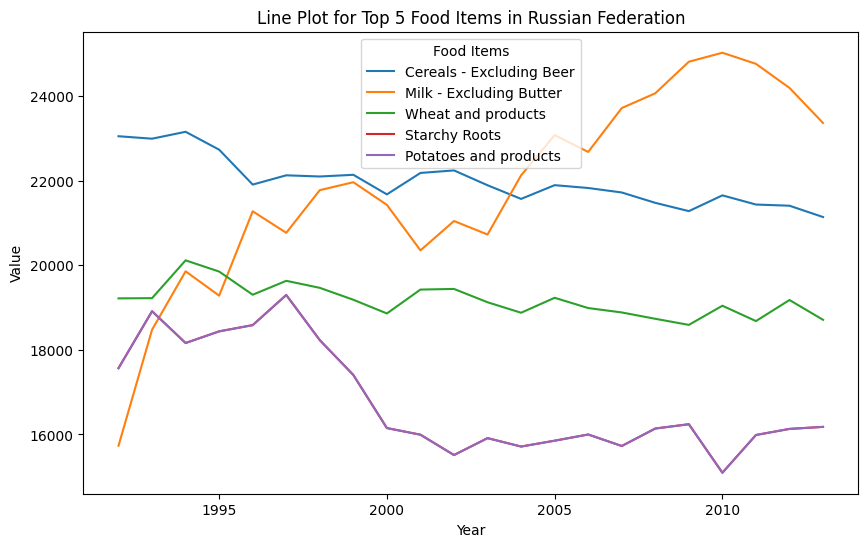

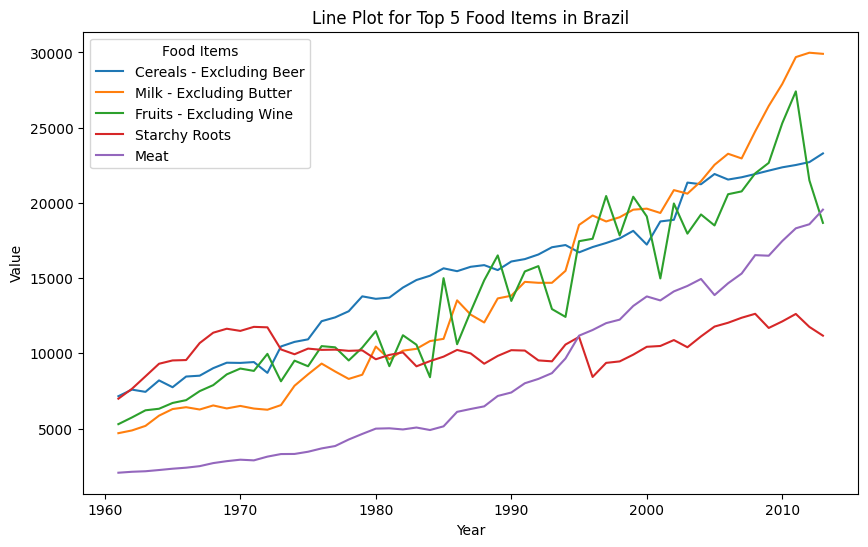

In [452]:
areas = top_5_areas.index.tolist()

for area in areas:
    # Filter the top 5 food items for the specific area and element 'Food'
    food_items = top_5_food[(top_5_food['area'] == area) & (top_5_food['element'] == 'Food')]['item'].values
    
    # Call the function to create the plot
    plot_top_items(merged_df, area, food_items, 'Food', 'area')

In [453]:
top_5_feed = merged_df[filtered_feed].groupby(['area', 'item', 'element'])['average_production'].mean()
top_5_feed = top_5_feed.groupby('area').nlargest(5).reset_index(level=0, drop=True).reset_index()
top_5_feed

,area,item,element,average_production
0,Brazil,Cereals - Excluding Beer,Feed,20385.754717
1,Brazil,Maize and products,Feed,19606.358491
2,Brazil,Starchy Roots,Feed,12620.018868
3,Brazil,Cassava and products,Feed,12162.924528
4,Brazil,Sugar Crops,Feed,7022.037736
5,"China, mainland",Cereals - Excluding Beer,Feed,77070.056604
6,"China, mainland",Maize and products,Feed,60690.716981
7,"China, mainland",Starchy Roots,Feed,47778.754717
8,"China, mainland",Sweet potatoes,Feed,34963.377358
9,"China, mainland",Rice (Milled Equivalent),Feed,9273.679245


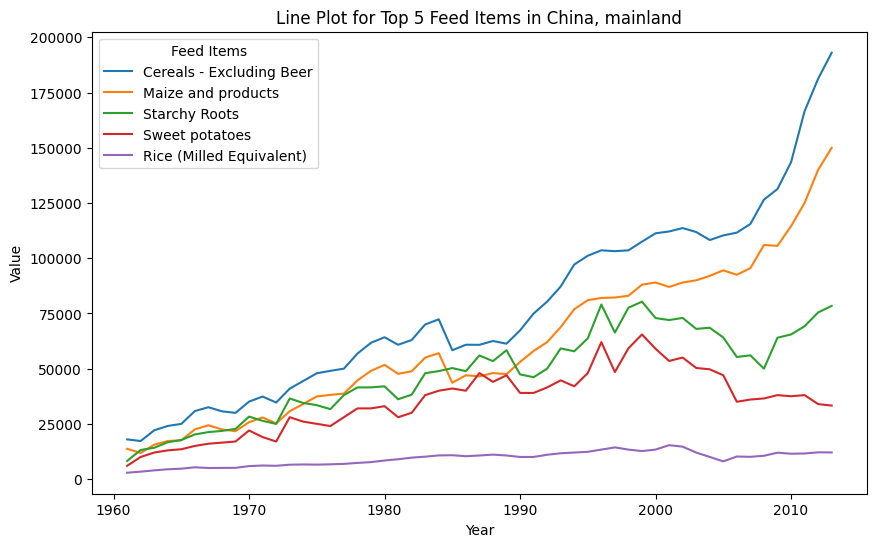

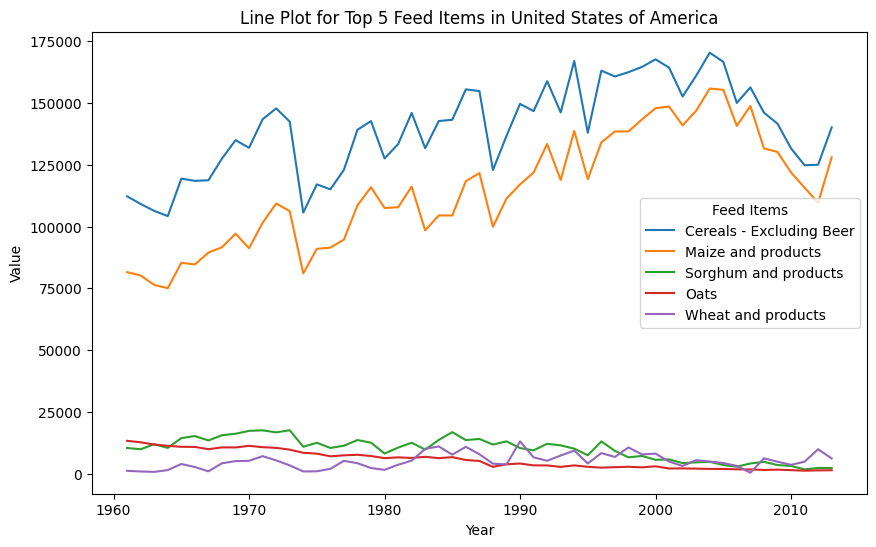

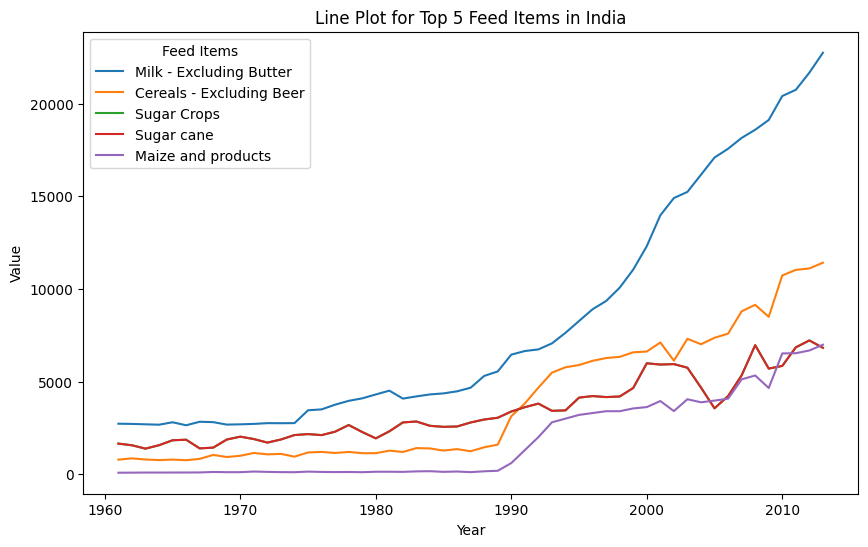

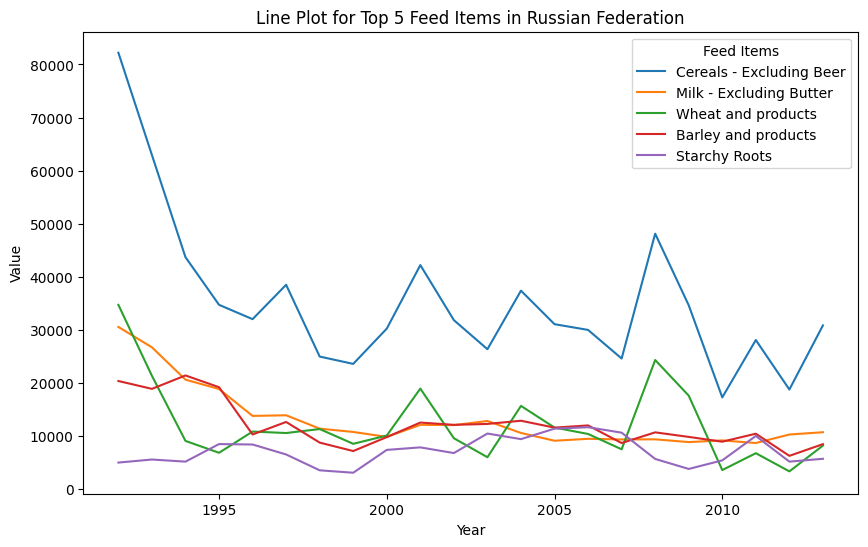

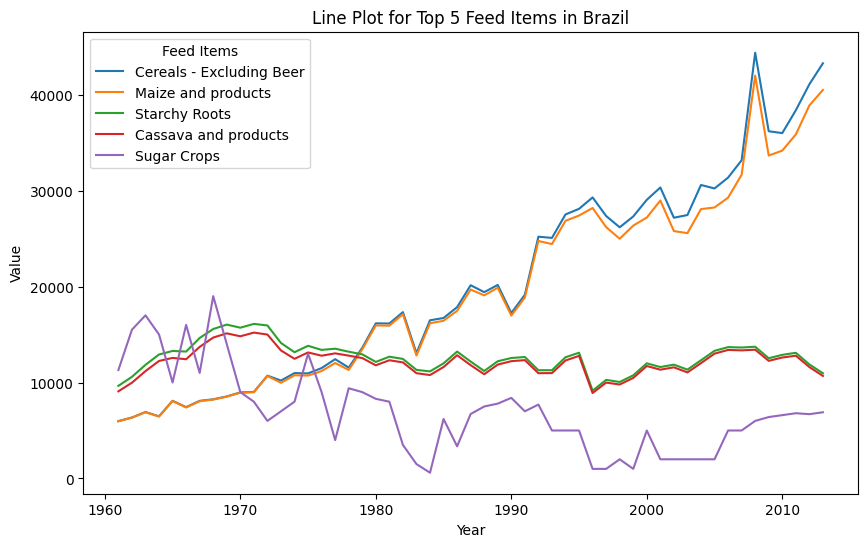

In [454]:
areas = top_5_areas.index.tolist()

for area in areas:
    feed_items = top_5_feed[(top_5_feed['area'] == area) & (top_5_feed['element'] == 'Feed')]['item'].values
    
    # Call the function to create the plot
    plot_top_items(merged_df, area, feed_items, 'Feed', 'area')

Per continent

In [455]:
average_production_by_continent = merged_df.groupby('continent')['average_production'].mean()
top_3_continents = average_production_by_continent.nlargest(3)

food_by_continent = (merged_df['continent'].isin(top_3_continents.index)) & (merged_df['element'] == 'Food')
feed_by_continent = (merged_df['continent'].isin(top_3_continents.index)) & (merged_df['element'] == 'Feed')

top_5_food_per_continent = merged_df[food_by_continent].groupby(['continent', 'item', 'element'])['average_production'].mean()
top_5_food_per_continent = top_5_food_per_continent.groupby('continent').nlargest(5).reset_index(level=0, drop=True).reset_index()
top_5_feed_per_continent = merged_df[feed_by_continent].groupby(['continent', 'item', 'element'])['average_production'].mean()
top_5_feed_per_continent = top_5_feed_per_continent.groupby('continent').nlargest(5).reset_index(level=0, drop=True).reset_index()


In [456]:
df_seen =[]

def extract_year_values_by_continent(df):
    continent_year_values = []
    continents = df['continent'].unique()

    # Loop through each continent
    for continent in continents:
        # Filter the DataFrame for the current continent
        continent_df = df[df['continent'] == continent]
        
        # Extract the year values using the existing function
        year_df = extract_year_values(continent_df)
        
        # Group by Year and Continent and sum up the values
        aggregated_df = year_df.groupby(['continent', 'year', 'item', 'element']).agg({'year Value': 'sum'}).reset_index()
        
        # Append the aggregated data to the list
        continent_year_values.append(aggregated_df)

    df_seen = continent_year_values
    # Concatenate all continent data into a single DataFrame
    return pd.concat(continent_year_values, ignore_index=True)

print(df_seen)

[]


In [460]:
print(df_seen)

[]


In [457]:

def plot_top_items_continent(df, areas, items, element, str):
    plt.figure(figsize=(10, 6))
    
    # Loop through each item and filter, extract, and plot the data
    for item in items:
        # Filter the DataFrame for the specified area, item, and element
        filtered_df = df[(df[str] == area) & (df['item'] == item) & (df['element'] == element)]
        
        # Extract year values
        year_df = extract_year_values_by_continent(filtered_df)
        
        # Plot the data
        sns.lineplot(x='year', y='year Value', data=year_df, label=item)
    
    # Customize the plot
    plt.title(f'Line Plot for Top 5 {element} Items in {area}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend(title=f'{element} Items')
    plt.show()

['Cereals - Excluding Beer' 'Vegetables' 'Vegetables, Other'
 'Rice (Milled Equivalent)' 'Wheat and products']


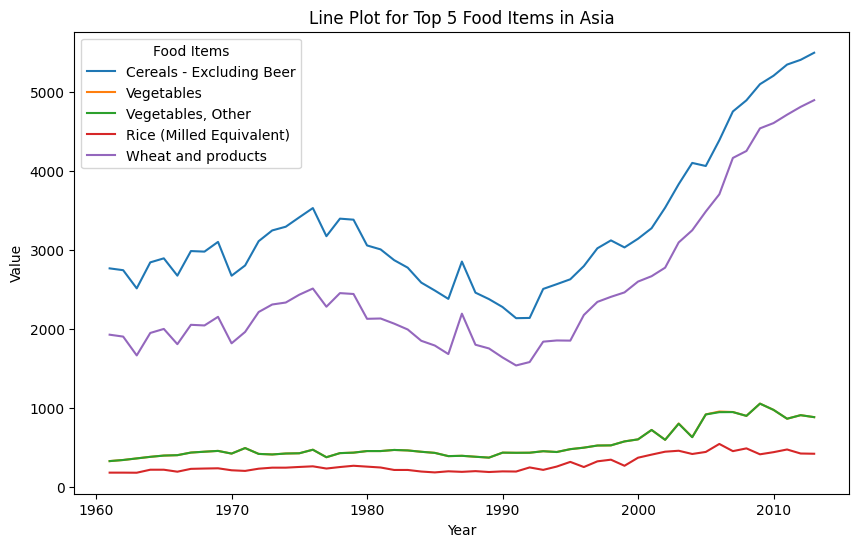

['Milk - Excluding Butter' 'Cereals - Excluding Beer' 'Wheat and products'
 'Vegetables' 'Starchy Roots']


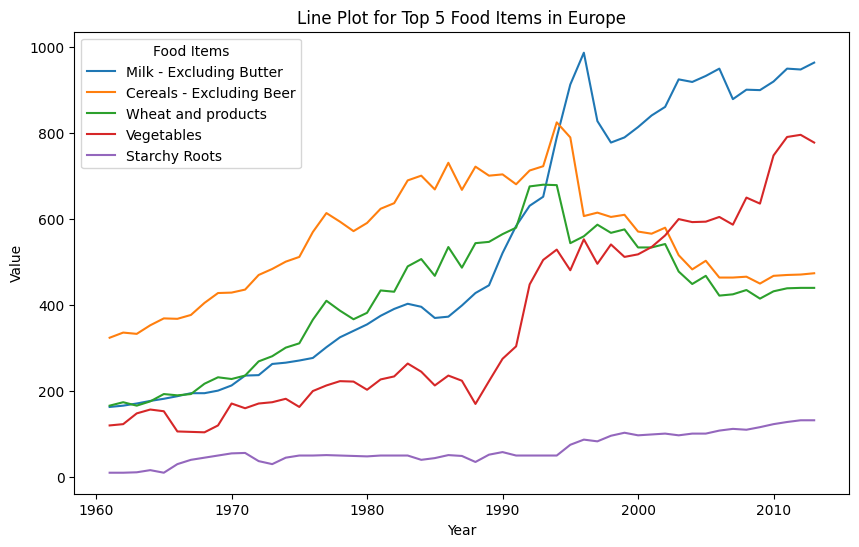

['Milk - Excluding Butter' 'Cereals - Excluding Beer'
 'Fruits - Excluding Wine' 'Vegetables' 'Meat']


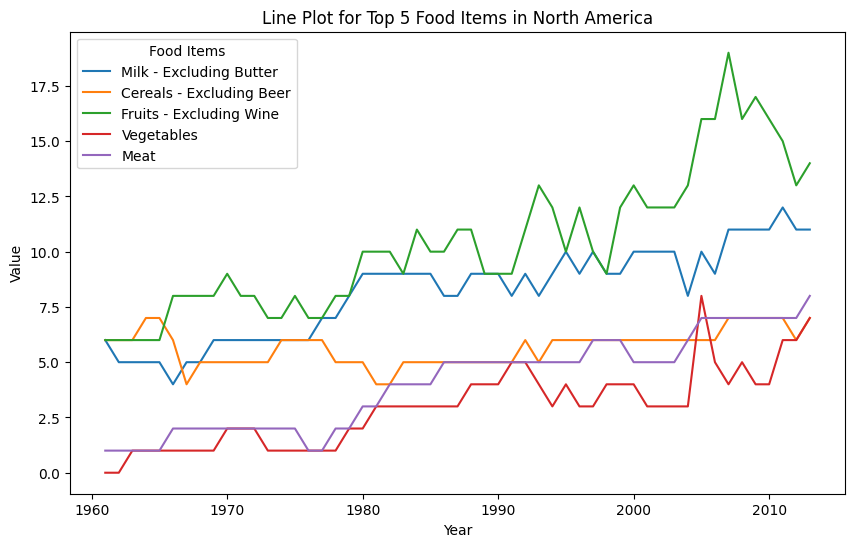

In [458]:
areas = top_3_continents.index.tolist()

for area in areas:
    # Filter the top 5 food items for the specific area and element 'Food'
    food_items = top_5_food_per_continent[(top_5_food_per_continent['continent'] == area) & (top_5_food_per_continent['element'] == 'Food')]['item'].values

    print(food_items)
    
    # Call the function to create the plot
    plot_top_items_continent(merged_df, area, food_items, 'Food', 'continent')

['Cereals - Excluding Beer' 'Sweet potatoes' 'Maize and products'
 'Starchy Roots' 'Sugar cane']


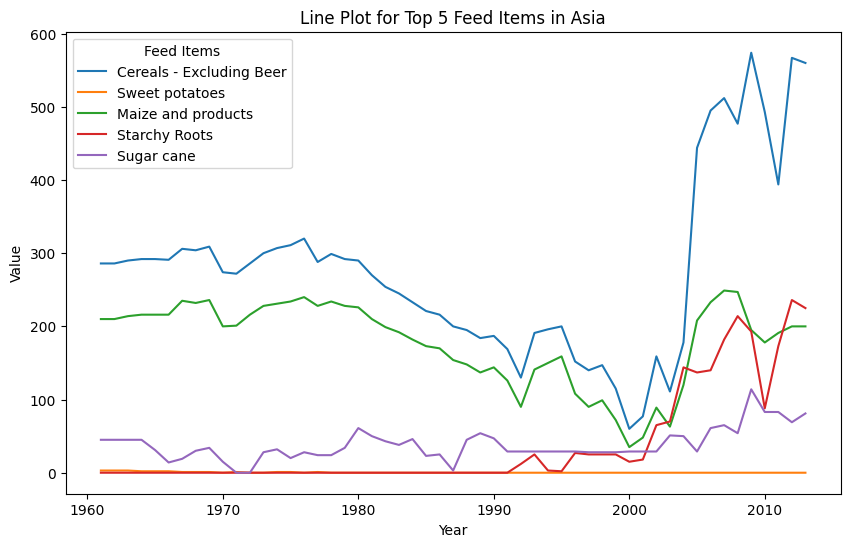

['Cereals - Excluding Beer' 'Barley and products' 'Maize and products'
 'Wheat and products' 'Starchy Roots']


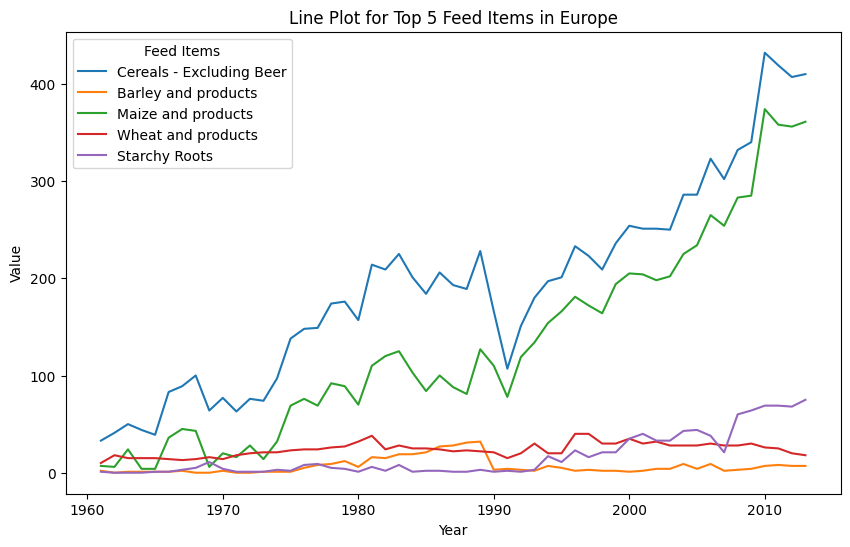

['Cereals - Excluding Beer' 'Maize and products' 'Sorghum and products'
 'Wheat and products' 'Barley and products']


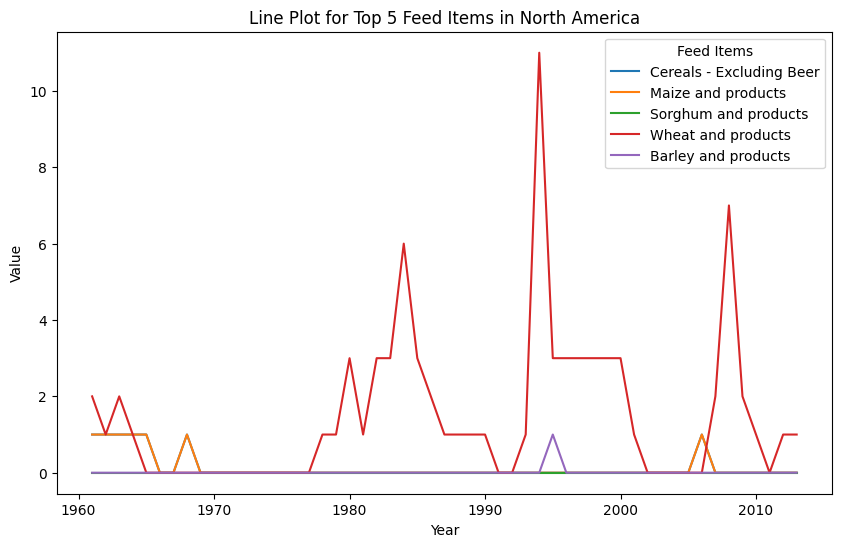

In [459]:
areas = top_3_continents.index.tolist()

for area in areas:
    # Filter the top 5 food items for the specific area and element 'Food'
    food_items = top_5_feed_per_continent[(top_5_feed_per_continent['continent'] == area) & (top_5_feed_per_continent['element'] == 'Feed')]['item'].values

    print(food_items)
    
    # Call the function to create the plot
    plot_top_items_continent(merged_df, area, food_items, 'Feed', 'continent')